In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("/content/drive/My Drive/딥러닝_프로젝트/df_team_new.csv", encoding="cp949")
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,117,118,119,120,224,225,226,227,331,332,333,334,438,439,440,441) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,assists,champLevel,championId,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameId,goldEarned,goldSpent,inhibitorKills,item0,item1,item2,item3,item4,item5,item6,killingSprees,kills,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicalDamageTaken,neutralMinionsKilled,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,objectivePlayerScore,participantId,pentaKills,...,physicalDamageTaken.4,playerScore0.4,playerScore1.4,playerScore2.4,playerScore3.4,playerScore4.4,playerScore5.4,playerScore6.4,playerScore7.4,playerScore8.4,playerScore9.4,quadraKills.4,queueId.4,sightWardsBoughtInGame.4,spell1Id.4,spell2Id.4,statPerk0.4,statPerk1.4,statPerk2.4,teamId.4,timeCCingOthers.4,totalDamageDealt.4,totalDamageDealtToChampions.4,totalDamageTaken.4,totalHeal.4,totalMinionsKilled.4,totalPlayerScore.4,totalScoreRank.4,totalTimeCrowdControlDealt.4,totalUnitsHealed.4,tripleKills.4,trueDamageDealt.4,trueDamageDealtToChampions.4,trueDamageTaken.4,turretKills.4,unrealKills.4,visionScore.4,visionWardsBoughtInGame.4,wardsKilled.4,wardsPlaced.4
0,0,17,13,43,0,569,132,15476,5,0,False,False,False,False,4260391136,7657,7525,0,2424,3174,3853,3504,3105,3117,3364,1,2,0,2,1,480,22982,13006,7841,0,0.0,0.0,0,1,0,...,21524,0,0,0,0,0,0,0,0,0,0,0,420,0,11,4,5005.0,5008.0,5002.0,100,28,158098,12026,40538,8001,40,0,0,1277,1,0,6539,1176,1194,0,0,17,3,3.0,4.0
1,0,15,14,235,0,7412,4074,12738,4,0,False,False,True,False,4260391136,10331,8200,0,3864,2033,3107,3009,3174,3179,3364,1,4,310,2,1,889,115,115,8401,8,1.0,0.0,0,6,0,...,17641,0,0,0,0,0,0,1,0,0,0,0,420,0,4,14,5005.0,5008.0,5003.0,200,21,154073,20492,30250,7055,224,0,0,87,1,0,2756,1956,1764,0,0,22,4,3.0,13.0
2,0,9,11,21,0,1939,1939,5286,4,0,False,False,False,False,4260275801,6346,6375,0,1055,3508,2055,1083,3006,1018,3340,0,0,522,0,0,479,1518,578,2669,0,0.0,0.0,0,1,0,...,7137,0,0,0,0,0,0,0,0,0,0,0,420,0,12,4,5008.0,5008.0,5003.0,100,23,74647,16858,18405,6910,144,0,0,108,1,1,0,0,3639,0,0,13,1,1.0,7.0
3,0,10,10,43,0,1107,1107,6821,5,0,False,False,True,False,4260275801,5925,5975,0,2424,3191,3853,3108,3174,3117,3364,0,1,0,0,1,474,14256,5979,3043,0,0.0,0.0,0,6,0,...,11907,0,0,0,0,0,0,0,0,0,0,0,420,0,3,4,5005.0,5008.0,5002.0,200,21,107692,14301,15207,3033,160,0,0,104,1,0,772,274,1443,1,0,18,2,1.0,8.0
4,0,3,15,236,0,7212,1287,5667,2,2,False,False,False,False,4252680802,14340,13550,0,3086,3153,3123,3508,3071,3006,3363,3,8,749,3,3,514,6732,1790,4861,10,0.0,8.0,0,1,0,...,11911,0,0,0,0,0,0,0,0,0,0,0,420,0,4,12,5008.0,5008.0,5002.0,100,21,131588,11655,21086,2332,174,0,0,278,1,0,240,240,414,1,0,18,5,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102911,0,2,13,421,0,22723,2060,14517,6,0,False,False,False,False,4286311007,9075,8000,1,2421,3082,1011,1412,3044,3047,3364,1,3,0,2,1,334,6830,0,8204,124,9.0,90.0,0,6,0,...,8019,0,0,0,0,0,0,0,0,0,0,0,420,0,7,4,5005.0,5008.0,5002.0,200,3,105184,14400,10186,1167,185,0,0,35,2,0,720,312,76,0,0,19,7,3.0,15.0
102912,0,7,15,245,0,14608,0,22422,5,0,False,False,False,False,4285849491,10215,10300,0,2420,3100,3152,1402,0,3020,3364,0,0,0,0,0,795,165412,15967,9181,170,31.0,93.0,0,1,0,...,11854,0,0,0,0,0,0,0,0,0,0,0,420,0,7,4,5005.0,5008.0,5001.0,100,25,159430,20108,15774,2783,219,0,0,283,3,0,3502,885,350,0,0,24,6,5.0,14.0
102913,0,21,14,235,0,8848,3216,5569,4,0,False,False,False,False,4285849491,8743,8000,1,3864,2424,3123,3814,3147,3009,3364,0,0,444,0,0,785,0,0,3048,8,0.0,8.0,0,6,0,...,23276,0,0,0,0,0,0,0,0,0,0,0,420,0,4,11,5005.0,5008.0,5002.0,200,36,179821,22877,32503,14666,32,0,0,457,1,0,15280,15

In [0]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)
df

,assists,champLevel,championId,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameId,goldEarned,goldSpent,inhibitorKills,item0,item1,item2,item3,item4,item5,item6,killingSprees,kills,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicalDamageTaken,neutralMinionsKilled,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,objectivePlayerScore,participantId,pentaKills,perk0,...,physicalDamageTaken.4,playerScore0.4,playerScore1.4,playerScore2.4,playerScore3.4,playerScore4.4,playerScore5.4,playerScore6.4,playerScore7.4,playerScore8.4,playerScore9.4,quadraKills.4,queueId.4,sightWardsBoughtInGame.4,spell1Id.4,spell2Id.4,statPerk0.4,statPerk1.4,statPerk2.4,teamId.4,timeCCingOthers.4,totalDamageDealt.4,totalDamageDealtToChampions.4,totalDamageTaken.4,totalHeal.4,totalMinionsKilled.4,totalPlayerScore.4,totalScoreRank.4,totalTimeCrowdControlDealt.4,totalUnitsHealed.4,tripleKills.4,trueDamageDealt.4,trueDamageDealtToChampions.4,trueDamageTaken.4,turretKills.4,unrealKills.4,visionScore.4,visionWardsBoughtInGame.4,wardsKilled.4,wardsPlaced.4
0,17,13,43,0,569,132,15476,5,0,False,False,False,False,4260391136,7657,7525,0,2424,3174,3853,3504,3105,3117,3364,1,2,0,2,1,480,22982,13006,7841,0,0.0,0.0,0,1,0,8229.0,...,21524,0,0,0,0,0,0,0,0,0,0,0,420,0,11,4,5005.0,5008.0,5002.0,100,28,158098,12026,40538,8001,40,0,0,1277,1,0,6539,1176,1194,0,0,17,3,3.0,4.0
1,15,14,235,0,7412,4074,12738,4,0,False,False,True,False,4260391136,10331,8200,0,3864,2033,3107,3009,3174,3179,3364,1,4,310,2,1,889,115,115,8401,8,1.0,0.0,0,6,0,8351.0,...,17641,0,0,0,0,0,0,1,0,0,0,0,420,0,4,14,5005.0,5008.0,5003.0,200,21,154073,20492,30250,7055,224,0,0,87,1,0,2756,1956,1764,0,0,22,4,3.0,13.0
2,9,11,21,0,1939,1939,5286,4,0,False,False,False,False,4260275801,6346,6375,0,1055,3508,2055,1083,3006,1018,3340,0,0,522,0,0,479,1518,578,2669,0,0.0,0.0,0,1,0,8005.0,...,7137,0,0,0,0,0,0,0,0,0,0,0,420,0,12,4,5008.0,5008.0,5003.0,100,23,74647,16858,18405,6910,144,0,0,108,1,1,0,0,3639,0,0,13,1,1.0,7.0
3,10,10,43,0,1107,1107,6821,5,0,False,False,True,False,4260275801,5925,5975,0,2424,3191,3853,3108,3174,3117,3364,0,1,0,0,1,474,14256,5979,3043,0,0.0,0.0,0,6,0,8229.0,...,11907,0,0,0,0,0,0,0,0,0,0,0,420,0,3,4,5005.0,5008.0,5002.0,200,21,107692,14301,15207,3033,160,0,0,104,1,0,772,274,1443,1,0,18,2,1.0,8.0
4,3,15,236,0,7212,1287,5667,2,2,False,False,False,False,4252680802,14340,13550,0,3086,3153,3123,3508,3071,3006,3363,3,8,749,3,3,514,6732,1790,4861,10,0.0,8.0,0,1,0,8005.0,...,11911,0,0,0,0,0,0,0,0,0,0,0,420,0,4,12,5008.0,5008.0,5002.0,100,21,131588,11655,21086,2332,174,0,0,278,1,0,240,240,414,1,0,18,5,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102911,2,13,421,0,22723,2060,14517,6,0,False,False,False,False,4286311007,9075,8000,1,2421,3082,1011,1412,3044,3047,3364,1,3,0,2,1,334,6830,0,8204,124,9.0,90.0,0,6,0,8010.0,...,8019,0,0,0,0,0,0,0,0,0,0,0,420,0,7,4,5005.0,5008.0,5002.0,200,3,105184,14400,10186,1167,185,0,0,35,2,0,720,312,76,0,0,19,7,3.0,15.0
102912,7,15,245,0,14608,0,22422,5,0,False,False,False,False,4285849491,10215,10300,0,2420,3100,3152,1402,0,3020,3364,0,0,0,0,0,795,165412,15967,9181,170,31.0,93.0,0,1,0,9923.0,...,11854,0,0,0,0,0,0,0,0,0,0,0,420,0,7,4,5005.0,5008.0,5001.0,100,25,159430,20108,15774,2783,219,0,0,283,3,0,3502,885,350,0,0,24,6,5.0,14.0
102913,21,14,235,0,8848,3216,5569,4,0,False,False,False,False,4285849491,8743,8000,1,3864,2424,3123,3814,3147,3009,3364,0,0,444,0,0,785,0,0,3048,8,0.0,8.0,0,6,0,8351.0,...,23276,0,0,0,0,0,0,0,0,0,0,0,420,0,4,11,5005.0,5008.0,5002.0,200,36,179821,22877,

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102916 entries, 0 to 102915
Columns: 535 entries, assists to wardsPlaced.4
dtypes: float64(165), int64(350), object(20)
memory usage: 420.1+ MB


In [0]:
# 해당 열의 데이터 타입을 숫자형으로 변경하기
df['firstBloodAssist'] = pd.to_numeric(df['firstBloodAssist'])
df['firstBloodKill'] = pd.to_numeric(df['firstBloodKill'])
df['firstTowerAssist'] = pd.to_numeric(df['firstTowerAssist'])
df['firstTowerKill'] = pd.to_numeric(df['firstTowerKill'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102916 entries, 0 to 102915
Columns: 535 entries, assists to wardsPlaced.4
dtypes: float64(169), int64(350), object(16)
memory usage: 420.1+ MB


In [0]:
# 해당 열의 데이터 타입을 숫자형으로 변경하기
df['firstBloodAssist.1'] = pd.to_numeric(df['firstBloodAssist.1'])
df['firstBloodKill.1'] = pd.to_numeric(df['firstBloodKill.1'])
df['firstTowerAssist.1'] = pd.to_numeric(df['firstTowerAssist.1'])
df['firstTowerKill.1'] = pd.to_numeric(df['firstTowerKill.1'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
df['firstBloodAssist.2'] = pd.to_numeric(df['firstBloodAssist.2'])
df['firstBloodKill.2'] = pd.to_numeric(df['firstBloodKill.2'])
df['firstTowerAssist.2'] = pd.to_numeric(df['firstTowerAssist.2'])
df['firstTowerKill.2'] = pd.to_numeric(df['firstTowerKill.2'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
df['firstBloodAssist.3'] = pd.to_numeric(df['firstBloodAssist.3'])
df['firstBloodKill.3'] = pd.to_numeric(df['firstBloodKill.3'])
df['firstTowerAssist.3'] = pd.to_numeric(df['firstTowerAssist.3'])
df['firstTowerKill.3'] = pd.to_numeric(df['firstTowerKill.3'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
df['firstBloodAssist.4'] = pd.to_numeric(df['firstBloodAssist.4'])
df['firstBloodKill.4'] = pd.to_numeric(df['firstBloodKill.4'])
df['firstTowerAssist.4'] = pd.to_numeric(df['firstTowerAssist.4'])
df['firstTowerKill.4'] = pd.to_numeric(df['firstTowerKill.4'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102916 entries, 0 to 102915
Columns: 490 entries, assists to wardsPlaced.4
dtypes: float64(185), int64(305)
memory usage: 384.7 MB


In [0]:
result = pd.read_csv("/content/drive/My Drive/딥러닝_프로젝트/result_team.csv", encoding = "cp949")
result

,Unnamed: 0,0
0,0,False
1,1,True
2,2,True
3,3,False
4,4,False
...,...,...
102911,102911,True
102912,102912,False
102913,102913,True
102914,102914,True


In [0]:
r = result["0"]
r

0         False
1          True
2          True
3         False
4         False
          ...  
102911     True
102912    False
102913     True
102914     True
102915    False
Name: 0, Length: 102916, dtype: bool

In [0]:
result = pd.get_dummies(r)
result

,False,True
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
102911,0,1
102912,1,0
102913,0,1
102914,0,1


In [0]:
data = df.to_numpy()
result = result.to_numpy()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv1D, Flatten

In [0]:
x = data
y = result

split_index = int(x.shape[0]*0.7)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print("train_x : ", train_x.size, " test_x : ", test_x.size)
print("train_y : ", train_y.size, " test_y : ", test_y.size)

train_x :  38541935  test_x :  16518125
train_y :  144082  test_y :  61750


In [0]:
# 딥러닝 구동을 위한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 필요한 라이브러리 호출
import numpy as np
import pandas as pd

# 실행할 때 마다 같은 결과를 출력하기 위해 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 딥러닝 구조를 결정 - 모델을 설정하고 실행하는 부분. 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성하며, 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용한다.
model = Sequential()  # 딥러닝의 구조를 짜고 층을 설정하는 부분
model.add(Dense(1000, input_dim = 535, activation = "relu"))  #  300이란 이 층에 300개의 노드를 설정한다는 의미이고, input_dim은 입력 데이터 개수이다. 이 층은 입력층이자 은닉층 역할을 한다. 
model.add(Dense(2, activation = "sigmoid"))  # 맨 마지막 층은 출력층이 된다. 

# 현재 모델은 2개의 층을 가진 상태로 은닉층과 출력층 역할을 하고 있다. 

# 모델 학습 과정 설정하기 - 모델을 컴퓨터가 알아들을 수 있게 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])  # 평균 제곱 오차 함수 mse를 사용, metrics는 모델이 컴파일될 때 모델 수행 결과를 나타내도록 하는 역할. 

# 모델 학습시키기 - 실제로 모델을 수행하는 부분
model.fit(train_x, train_y, epochs = 1000, batch_size  = 100)

# 히스토리


# 모델 평가하기
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=100)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/1000
721/721 [==============================] - 2s 3ms/step - loss: 285242.1875 - accuracy: 0.4989
Epoch 2/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 3/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 4/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5012
Epoch 5/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 6/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4986
Epoch 7/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 8/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 9/1000
721/721 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 10/1000
721/721 [==============================] - 2s 3ms/step - loss: 

In [0]:
# 딥러닝 구조를 결정 - 모델을 설정하고 실행하는 부분. 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성하며, 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용한다.
model = Sequential()  # 딥러닝의 구조를 짜고 층을 설정하는 부분
model.add(Dense(1000, input_dim = 490, activation = "relu"))  #  300이란 이 층에 300개의 노드를 설정한다는 의미이고, input_dim은 입력 데이터 개수이다. 이 층은 입력층이자 은닉층 역할을 한다. 
model.add(Dense(2000, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))  # 맨 마지막 층은 출력층이 된다. 

# 현재 모델은 2개의 층을 가진 상태로 은닉층과 출력층 역할을 하고 있다. 

# 모델 학습 과정 설정하기 - 모델을 컴퓨터가 알아들을 수 있게 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])  # 평균 제곱 오차 함수 mse를 사용, metrics는 모델이 컴파일될 때 모델 수행 결과를 나타내도록 하는 역할. 

# 모델 학습시키기 - 실제로 모델을 수행하는 부분
model.fit(train_x, train_y, epochs = 1000, batch_size  = 1000)

# 히스토리


# 모델 평가하기
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=1000)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/2000
73/73 [==============================] - 1s 7ms/step - loss: 893050.8750 - accuracy: 0.5005
Epoch 2/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4962
Epoch 5/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.4978
Epoch 6/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.4986
Epoch 8/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 9/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/2000
73/73 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0

In [0]:
# 딥러닝 구조를 결정 - 모델을 설정하고 실행하는 부분. 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성하며, 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용한다.
model = Sequential()  # 딥러닝의 구조를 짜고 층을 설정하는 부분
model.add(Dense(10000, input_dim = 535, activation = "relu"))  #  300이란 이 층에 300개의 노드를 설정한다는 의미이고, input_dim은 입력 데이터 개수이다. 이 층은 입력층이자 은닉층 역할을 한다. 
model.add(Dense(5000, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))  # 맨 마지막 층은 출력층이 된다. 

# 현재 모델은 2개의 층을 가진 상태로 은닉층과 출력층 역할을 하고 있다. 

# 모델 학습 과정 설정하기 - 모델을 컴퓨터가 알아들을 수 있게 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])  # 평균 제곱 오차 함수 mse를 사용, metrics는 모델이 컴파일될 때 모델 수행 결과를 나타내도록 하는 역할. 

# 모델 학습시키기 - 실제로 모델을 수행하는 부분
model.fit(train_x, train_y, epochs = 1000, batch_size  = 1000)

# 히스토리


# 모델 평가하기
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=1000)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/1000
73/73 [==============================] - 4s 51ms/step - loss: 751963.3750 - accuracy: 0.5005
Epoch 2/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6932 - accuracy: 0.4962
Epoch 5/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6931 - accuracy: 0.4978
Epoch 6/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6931 - accuracy: 0.4986
Epoch 8/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 9/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/1000
73/73 [==============================] - 4s 50ms/step - loss: 0.6932 - a

In [0]:
# 딥러닝 구조를 결정 - 모델을 설정하고 실행하는 부분. 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성하며, 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용한다.
model = Sequential()  # 딥러닝의 구조를 짜고 층을 설정하는 부분
model.add(Dense(10000, input_dim = 535, activation = "relu"))  #  300이란 이 층에 300개의 노드를 설정한다는 의미이고, input_dim은 입력 데이터 개수이다. 이 층은 입력층이자 은닉층 역할을 한다. 
model.add(Dense(10000, activation = "relu"))
model.add(Dense(10000, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))  # 맨 마지막 층은 출력층이 된다. 

# 현재 모델은 2개의 층을 가진 상태로 은닉층과 출력층 역할을 하고 있다. 

# 모델 학습 과정 설정하기 - 모델을 컴퓨터가 알아들을 수 있게 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])  # 평균 제곱 오차 함수 mse를 사용, metrics는 모델이 컴파일될 때 모델 수행 결과를 나타내도록 하는 역할. 

# 모델 학습시키기 - 실제로 모델을 수행하는 부분
model.fit(train_x, train_y, epochs = 500, batch_size  = 1000)

# 히스토리


# 모델 평가하기
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=1000)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/2000
15/15 [==============================] - 16s 1s/step - loss: 2231857.0000 - accuracy: 0.4966
Epoch 2/2000
15/15 [==============================] - 17s 1s/step - loss: 0.6936 - accuracy: 0.5000
Epoch 3/2000
15/15 [==============================] - 16s 1s/step - loss: 0.6932 - accuracy: 0.4987
Epoch 4/2000
15/15 [==============================] - 15s 990ms/step - loss: 0.6931 - accuracy: 0.4988
Epoch 5/2000
15/15 [==============================] - 15s 989ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/2000
15/15 [==============================] - 15s 999ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/2000
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/2000
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/2000
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 10/2000
15/15 [==============================] - 15s 995ms/step - loss: 0.6931 

KeyboardInterrupt: ignored

Epoch 1/50
73/73 [==============================] - 35s 474ms/step - loss: 0.7863 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
73/73 [==============================] - 34s 467ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
73/73 [==============================] - 34s 467ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
73/73 [==============================] - 34s 466ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
73/73 [==============================] - 34s 467ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
73/73 [==============================] - 34s 466ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
73/73 [==============================] - 34s 466ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000

KeyError: ignored

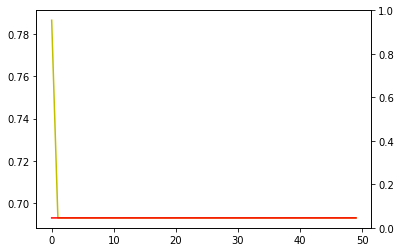

In [0]:
# 딥러닝 구동을 위한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 필요한 라이브러리 호출
import numpy as np
import pandas as pd

# 딥러닝 구조를 결정 - 모델을 설정하고 실행하는 부분. 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성하며, 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용한다.
model = Sequential()  # 딥러닝의 구조를 짜고 층을 설정하는 부분
model.add(Dense(15000, input_dim = 535, activation = "relu"))  #  300이란 이 층에 300개의 노드를 설정한다는 의미이고, input_dim은 입력 데이터 개수이다. 이 층은 입력층이자 은닉층 역할을 한다. 
model.add(Dense(10000, activation = "relu"))
model.add(Dense(2, activation = "softmax"))  # 맨 마지막 층은 출력층이 된다. 

# 현재 모델은 2개의 층을 가진 상태로 은닉층과 출력층 역할을 하고 있다. 

# 모델 학습 과정 설정하기 - 모델을 컴퓨터가 알아들을 수 있게 컴파일
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])  # 평균 제곱 오차 함수 mse를 사용, metrics는 모델이 컴파일될 때 모델 수행 결과를 나타내도록 하는 역할. 

# 4. 모델 학습시키기
hist = model.fit(train_x, train_y, epochs=50, batch_size=1000, validation_data=(test_x, test_y))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(train_x, train_y, epochs=10, batch_size=10000, validation_data=(test_x, test_y), callbacks=[tb_hist])

Epoch 1/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
8/8 [=========================

In [0]:
tensorboard --logdir=~/Projects/Keras/_writing/graph

SyntaxError: ignored

In [0]:
vi ~/.keras/keras.json

SyntaxError: ignored